## B.2 Example 3.3

This is a python implementation of Example 3.3 from:    
Gawronski, W., "Advanced structural dynamics and active control of structures".
New York, NY: Springer New York, 2004.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from control import ss, impulse_response, bode
from active_control_of_structures.functions import modal2

In [2]:
# Stiffness matrix:
k1, k2, k3, k4 = 3, 3, 3, 0
k = np.array([[k1 + k2,     -k2,       0],
              [    -k2, k2 + k3,     -k3],
              [      0,     -k3, k3 + k4]])

# Mass matrix:
m1, m2, m3 = 1, 1, 1
m = np.diag([m1, m2, m3])

# Damping matrix:
damp = .01 * k
mi = np.linalg.inv(m)

# State matrix:
a = np.block([[np.zeros((3,3)), np.eye(3)], [-mi @ k, -mi @ damp]])

# Input matrix:
bo = np.array([[0], [0], [1]])
bo = mi @ bo
b = np.vstack((np.zeros((3,1)), bo))

# Acceleration output:
ca = np.array([1, 0, 0])
d = ca @ mi @ bo
c = np.concatenate([-ca @ mi @ k, -ca @ mi @ damp])

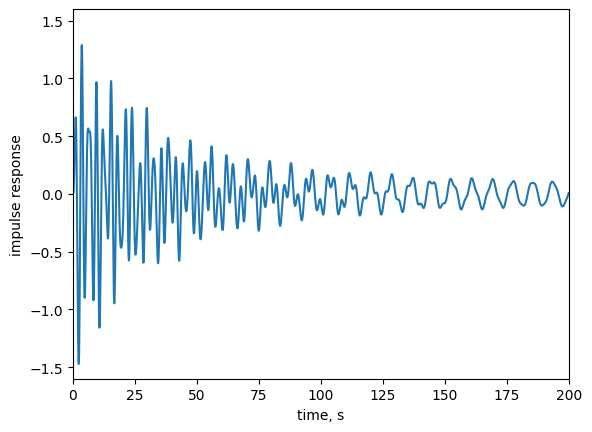

In [3]:
# Impulse response
dt = 0.1
t = np.arange(0, 200, dt)
sys = ss(a, b, c, d)
T, y = impulse_response(sys, t)

# Plot the impulse response
fig, ax = plt.subplots()
ax.plot(T, y)
ax.set(xlim=[0, 200], ylim=[-1.6, 1.6], xlabel='time, s', ylabel='impulse response')

plt.show()

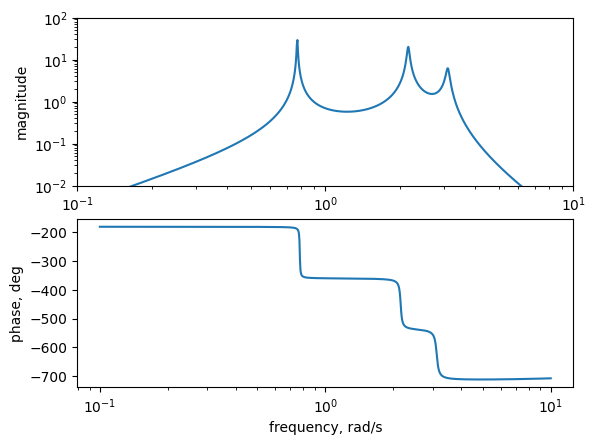

In [4]:
# Generate frequencies for Bode plot
w = np.logspace(-1, 1, 900)

# Calculate Bode plot
mag, phase, freq = bode(sys, w, dB=False, plot=False)

# Plot magnitude on a log-log scale
fig, axs = plt.subplots(2, 1)
axs[0].loglog(w, mag)
axs[0].axis([0.1, 10, 0.01, 100])
axs[0].set(xlabel='frequency, rad/s', ylabel='magnitude')

# Plot phase on a semi-log scale
axs[1].semilogx(freq, np.rad2deg(phase))  # Convert phase to degrees
axs[1].set(xlabel='frequency, rad/s', ylabel='phase, deg')

plt.show()